## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [10]:
from keras.layers import Dropout

"""
建立神經網路，並加入 dropout layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drop_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drop_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drop_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [17]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
Dropout_EXP = [0.1, 0.2, 0.25] 

In [24]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for dr in range(len(Dropout_EXP)): # itertools.product :笛卡爾積
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (LEARNING_RATE))
    model = build_mlp(input_shape=x_train.shape[1:], drop_ratio=Dropout_EXP[dr])
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    exp_name_tag = "exp-lr-%s" % str(dr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.001000
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)     

Epoch 48/50
196/196 [==============================] - 2s 12ms/step - loss: 1.1882 - accuracy: 0.5726 - val_loss: 1.3451 - val_accuracy: 0.5270
Epoch 49/50
196/196 [==============================] - 2s 12ms/step - loss: 1.1808 - accuracy: 0.5762 - val_loss: 1.3487 - val_accuracy: 0.5317
Epoch 50/50
196/196 [==============================] - 3s 13ms/step - loss: 1.1740 - accuracy: 0.5768 - val_loss: 1.3285 - val_accuracy: 0.5294
Experiment with LR = 0.001000
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
______________________________________________________

Epoch 45/50
196/196 [==============================] - 3s 14ms/step - loss: 1.3921 - accuracy: 0.4956 - val_loss: 1.3917 - val_accuracy: 0.5053
Epoch 46/50
196/196 [==============================] - 3s 14ms/step - loss: 1.3918 - accuracy: 0.4996 - val_loss: 1.3771 - val_accuracy: 0.5102
Epoch 47/50
196/196 [==============================] - 3s 14ms/step - loss: 1.3895 - accuracy: 0.5023 - val_loss: 1.3873 - val_accuracy: 0.5112
Epoch 48/50
196/196 [==============================] - 3s 14ms/step - loss: 1.3751 - accuracy: 0.5063 - val_loss: 1.3847 - val_accuracy: 0.5094
Epoch 49/50
196/196 [==============================] - 3s 14ms/step - loss: 1.3859 - accuracy: 0.5018 - val_loss: 1.3770 - val_accuracy: 0.5150
Epoch 50/50
196/196 [==============================] - 3s 14ms/step - loss: 1.3794 - accuracy: 0.5064 - val_loss: 1.4094 - val_accuracy: 0.5031
Experiment with LR = 0.001000
Model: "functional_1"
_________________________________________________________________
Layer (type)      

196/196 [==============================] - 3s 13ms/step - loss: 1.5058 - accuracy: 0.4584 - val_loss: 1.4776 - val_accuracy: 0.4685
Epoch 42/50
196/196 [==============================] - 2s 12ms/step - loss: 1.5094 - accuracy: 0.4583 - val_loss: 1.4549 - val_accuracy: 0.4838
Epoch 43/50
196/196 [==============================] - 3s 13ms/step - loss: 1.5087 - accuracy: 0.4574 - val_loss: 1.4629 - val_accuracy: 0.4765
Epoch 44/50
196/196 [==============================] - 2s 13ms/step - loss: 1.5072 - accuracy: 0.4565 - val_loss: 1.4782 - val_accuracy: 0.4738
Epoch 45/50
196/196 [==============================] - 2s 13ms/step - loss: 1.4973 - accuracy: 0.4596 - val_loss: 1.5046 - val_accuracy: 0.4639
Epoch 46/50
196/196 [==============================] - 3s 13ms/step - loss: 1.5005 - accuracy: 0.4580 - val_loss: 1.4871 - val_accuracy: 0.4759
Epoch 47/50
196/196 [==============================] - 2s 13ms/step - loss: 1.4935 - accuracy: 0.4638 - val_loss: 1.4644 - val_accuracy: 0.4875
Epoc

In [25]:
results

{'exp-lr-0': {'train-loss': [1.995552659034729,
   1.778742790222168,
   1.6883506774902344,
   1.64471435546875,
   1.6015996932983398,
   1.5622907876968384,
   1.5368643999099731,
   1.5146217346191406,
   1.503843903541565,
   1.4876923561096191,
   1.4691925048828125,
   1.449255108833313,
   1.4323910474777222,
   1.428924322128296,
   1.4145931005477905,
   1.4013545513153076,
   1.3924059867858887,
   1.3816453218460083,
   1.363128900527954,
   1.3624128103256226,
   1.3537805080413818,
   1.3469810485839844,
   1.3433440923690796,
   1.3316073417663574,
   1.3119902610778809,
   1.3032557964324951,
   1.3004823923110962,
   1.2954437732696533,
   1.28885018825531,
   1.2803728580474854,
   1.2687112092971802,
   1.2663941383361816,
   1.2562854290008545,
   1.257236361503601,
   1.2489643096923828,
   1.2467312812805176,
   1.2370156049728394,
   1.2355414628982544,
   1.2248719930648804,
   1.2258981466293335,
   1.217637538909912,
   1.210761308670044,
   1.2134219408035278

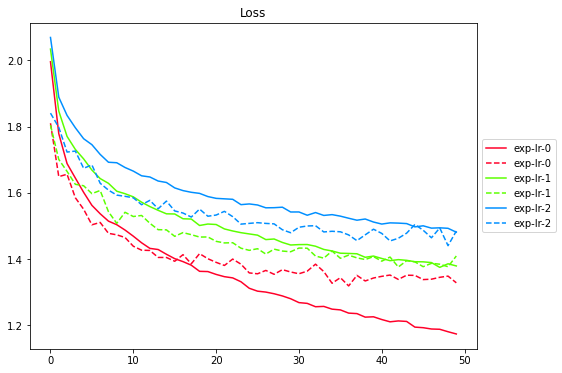

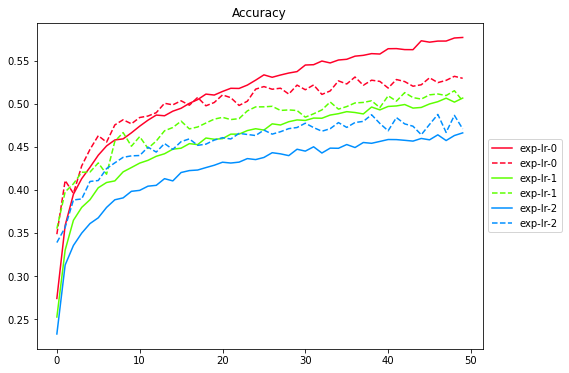

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline 
    
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
## drop ratio 越大的，損失函數會較大，準確率也比較低